In [37]:
import networkx as nx
G=nx.Graph()

In [38]:
import csv
with open("/Users/pacard/Desktop/Master/graph-text/training_set.txt", "r") as f:
    reader = csv.reader(f)
    training_set  = list(reader)

training_set = [element[0].split(" ") for element in training_set]

In [39]:
print len(training_set)

615512


In [40]:
edgelist = [(elem[0],elem[1]) for elem in training_set if elem[2]=='1']

In [41]:
H = nx.Graph(edgelist)

In [42]:
sorted(nx.common_neighbors(H,'9510123','9502114'))

['9302075']

In [43]:
len(sorted(nx.common_neighbors(H,'9510123','9502114')))

1

In [44]:
print len(nx.neighbors(H,'9510123'))


6


In [22]:
with open("/Users/pacard/Desktop/Master/graph-text/Train_common_neighbours_norm.txt", "w") as w:
    csv_out = csv.writer(w)
    for row in training_set:
        try:
            r = len(sorted(nx.common_neighbors(H,row[0],row[1])))/float(len(nx.neighbors(H,row[0])))
            csv_out.writerow([row[0],row[1],r])
        except:
            csv_out.writerow([row[0],row[1],0])
            continue

In [58]:
nx.number_of_nodes(H)

27684

In [23]:
with open("/Users/pacard/Desktop/Master/graph-text/testing_set.txt", "r") as f:
    reader = csv.reader(f)
    testing_set  = list(reader)

testing_set = [element[0].split(" ") for element in testing_set]

In [24]:
with open("/Users/pacard/Desktop/Master/graph-text/Test_common_neighbours_norm.txt", "w") as w:
    csv_out = csv.writer(w)
    for row in testing_set:
        try:
            r = len(sorted(nx.common_neighbors(H,row[0],row[1])))/float(len(nx.neighbors(H,row[0])))
            csv_out.writerow([row[0],row[1],r])
        except:
            csv_out.writerow([row[0],row[1],0])
            continue

# TF-IDF

In [1]:
import random
import numpy as np
from sklearn import preprocessing
import nltk
import csv

nltk.download('stopwords')
stpwds = set(nltk.corpus.stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pacard/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
class Stemmer :
    def stem(self, x):
        return x
    
stemmer = Stemmer()

In [3]:
with open("node_information.csv", "r") as f:
    reader = csv.reader(f)
    node_info  = list(reader)

In [75]:
node_head = []
for el in node_info:
    node_head.append(el[2])

In [76]:
print node_head[:5]

['compactification geometry and duality', 'domain walls and massive gauged supergravity potentials', 'comment on metric fluctuations in brane worlds', 'moving mirrors and thermodynamic paradoxes', 'bundles of chiral blocks and boundary conditions in cft']


In [77]:
def split(string, divs):
    for d in divs[1:]:
        string = string.replace(d, divs[0])
    return string.split(divs[0])


In [78]:
import string
import itertools
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


stopwords = stopwords.words('english')
words = []
wnl = WordNetLemmatizer()


for doc_id, text in enumerate(node_head):
    
    #On decode un peu le bordel
    doc = nltk.word_tokenize(text.decode('utf-8').lower())

    #On enlève la ponctuation
    punctuation = set(string.punctuation)
    doc = [w for w in doc if w not in punctuation]
    
    #On casse les mots à la con du type 8/10, ou quand le FdP a oublié un espace après le point..
    doc = [split(x,'.') for x in doc]
    doc = list(itertools.chain(*doc))
    doc = [split(x,'/') for x in doc]
    doc = list(itertools.chain(*doc))
    doc = [split(x,'`') for x in doc]
    doc = list(itertools.chain(*doc))
    
    #On enlève les stopwords
    doc = [w for w in doc if w not in stopwords]
    doc = [w for w in doc if w not in words]     
    
    #On enlève les pluriels
    doc = [wnl.lemmatize(w) for w in doc ]
    s = " ";
    doc = s.join(doc)
    #On stemme un peu tout ça
    #doc = [stemmer.stem(w) for w in doc]
    node_head[doc_id]=doc

In [79]:
print node_head[:10]

[u'compactification geometry duality', u'domain wall massive gauged supergravity potential', u'comment metric fluctuation brane world', u'moving mirror thermodynamic paradox', u'bundle chiral block boundary condition cft', u'question quantum physic', u'topological defect 3-d euclidean gravity', u'n 0 supersymmetry non-relativistic monopole', u'gluon pair production space-time dependent chromofield', u'instantons euclidean supersymmetry wick rotation']


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer


m = TfidfVectorizer()
tfidf_matrix = m.fit_transform(node_head)

In [109]:
from sklearn.decomposition import SparsePCA
pca = PCA(n_components=100)
pca.fit_transform(tfidf_matrix.toarray())

array([[-0.02288976,  0.01822028, -0.08483174, ...,  0.00317535,
         0.03435823,  0.02445276],
       [-0.0810176 ,  0.0353654 , -0.01475359, ..., -0.07016747,
        -0.00562271, -0.02300023],
       [-0.08662295,  0.00620666, -0.03694489, ..., -0.13775795,
         0.01811809,  0.01937653],
       ..., 
       [-0.06037219,  0.02650497, -0.0072799 , ..., -0.02904089,
        -0.17272778, -0.04611337],
       [-0.0635159 ,  0.02907164, -0.0227509 , ...,  0.05944986,
         0.01066301,  0.00087834],
       [-0.05140455,  0.02878766, -0.02929925, ..., -0.01304658,
         0.01618957,  0.00418086]])

In [116]:
from sklearn.cluster import KMeans

num_clusters = 100
km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

CPU times: user 59.3 s, sys: 1.1 s, total: 1min
Wall time: 1min


In [117]:
import matplotlib.pyplot as plt
% matplotlib inline

(array([  120.,   245.,   229.,   217.,    97.,   109.,   339.,   181.,
          611.,   122.,   639.,    78.,   229.,   600.,   179.,   416.,
          266.,   433.,   337.,   296.,   368.,   291.,   301.,   122.,
          298.,   106.,    58.,   214.,   220.,   287.,   183.,    58.,
          208.,   306.,    75.,   233.,   174.,   193.,   167.,   595.,
          277.,   164.,   318.,   131.,   380.,   144.,   289.,   199.,
          164.,   212.,   215.,   238.,   121.,   183.,   128.,    78.,
          111.,   273.,   326.,   164.,   239.,   310.,   425.,   118.,
          241.,   118.,   189.,   135.,   158.,   443.,  3594.,   320.,
          316.,   119.,   228.,   138.,   880.,   193.,   139.,   191.,
          158.,   157.,   608.,   130.,   119.,   272.,   202.,   121.,
          963.,   330.,   126.,   174.,    82.,   115.,    93.,   197.,
          122.,   289.,   291.,   412.]),
 array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
           9.,   10.,  

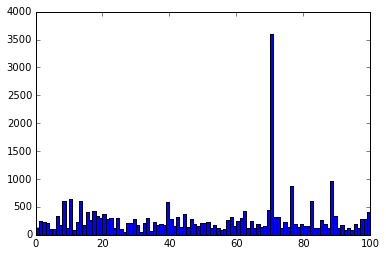

In [119]:
plt.hist(clusters, range = (0, 100), bins = 100)

In [114]:
import pandas as pd
df = pd.DataFrame(data=clusters)

In [115]:
print df[df[0]==2]

       0
14     2
49     2
56     2
90     2
102    2
107    2
112    2
124    2
160    2
198    2
223    2
251    2
297    2
304    2
305    2
312    2
315    2
328    2
377    2
415    2
418    2
448    2
449    2
516    2
573    2
574    2
627    2
635    2
676    2
692    2
...   ..
26913  2
26935  2
26943  2
26955  2
27006  2
27112  2
27128  2
27151  2
27154  2
27165  2
27174  2
27267  2
27282  2
27289  2
27303  2
27306  2
27319  2
27351  2
27368  2
27507  2
27557  2
27623  2
27624  2
27630  2
27664  2
27702  2
27717  2
27720  2
27724  2
27753  2

[1235 rows x 1 columns]
